# NLP (HW1)
## Persian Gender Recognition
## Authors: Nahal Mirzaie, Tahere Talaie
### Spring 1400

## Import 

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from os.path import isfile

import config
import utils
import data_path
import data_loader

from classifier import Classifier
from feature_generator import generate_features

## Load Datasets

In [2]:
female_dataset = data_loader.load_dataset(data_path.FEMALE_DATA_PATH)
male_dataset = data_loader.load_dataset(data_path.MALE_DATA_PATH)

### Check if auxilary datasets are created

In [3]:
if (not isfile(data_path.POSITIVE_WORDS_PATH)) or (not isfile(data_path.NEGATIVE_WORDS_PATH)):
    utils.import_positive_negative_words_from(
        path = data_path.EMOTION_LEXICON_WORDS_PATH,
        positive_words_path = data_path.POSITIVE_WORDS_PATH, 
        negative_words_path = data_path.NEGATIVE_WORDS_PATH
    )

## Generate Features

In [4]:
female_features = generate_features(female_dataset, label='0')
male_features = generate_features(male_dataset, label='1')

features = pd.concat([female_features, male_dataset], axis=0)

KeyboardInterrupt: 

## Split X, y 

In [43]:
y = features['Label']
X = features.drop('Label', axis=1)

## Normalize

In [44]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

## Classification

In [20]:
classifier = Classifier('Random Forest', n_estimator=200)
classifier.train(X, y, n_folds=10)

| index     |    Fold1 |    Fold2 |    Fold3 |    Fold4 |    Fold5 |    Fold6 |    Fold7 |    Fold8 |    Fold9 |   Fold10 |     mean |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| precision | 0.547619 | 0.571429 | 0.517241 | 0.466019 | 0.582278 | 0.65     | 0.563218 | 0.5625   | 0.535354 | 0.710843 | 0.57065  |
| recall    | 0.455446 | 0.525253 | 0.436893 | 0.564706 | 0.446602 | 0.468468 | 0.515789 | 0.478723 | 0.609195 | 0.526786 | 0.502786 |
| f1        | 0.497297 | 0.547368 | 0.473684 | 0.510638 | 0.505495 | 0.544503 | 0.538462 | 0.517241 | 0.569892 | 0.605128 | 0.530971 |
| accuracy  | 0.535    | 0.57     | 0.5      | 0.54     | 0.55     | 0.565    | 0.58     | 0.58     | 0.6      | 0.615    | 0.5635   |


In [8]:
classifier = Classifier('SVM')
classifier.train(X, y, n_folds=10)

| index     |    Fold1 |    Fold2 |    Fold3 |    Fold4 |    Fold5 |    Fold6 |    Fold7 |    Fold8 |    Fold9 |   Fold10 |     mean |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| precision | 0.579545 | 0.574257 | 0.590361 | 0.438202 | 0.589744 | 0.6875   | 0.489796 | 0.514286 | 0.55     | 0.697368 | 0.571106 |
| recall    | 0.50495  | 0.585859 | 0.475728 | 0.458824 | 0.446602 | 0.495495 | 0.505263 | 0.382979 | 0.632184 | 0.473214 | 0.49611  |
| f1        | 0.539683 | 0.58     | 0.526882 | 0.448276 | 0.508287 | 0.575916 | 0.497409 | 0.439024 | 0.588235 | 0.56383  | 0.526754 |
| accuracy  | 0.565    | 0.58     | 0.56     | 0.52     | 0.555    | 0.595    | 0.515    | 0.54     | 0.615    | 0.59     | 0.5635   |


In [19]:
classifier = Classifier('MLP', max_iter=400, hidden_layer_sizes=(16,), activation='relu', solver='sgd')
classifier.train(X, y, n_folds=10)

| index     |    Fold1 |    Fold2 |    Fold3 |    Fold4 |    Fold5 |    Fold6 |    Fold7 |    Fold8 |    Fold9 |   Fold10 |     mean |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| precision | 0.602273 | 0.546296 | 0.576087 | 0.463158 | 0.5      | 0.708861 | 0.547368 | 0.506667 | 0.529412 | 0.698795 | 0.567892 |
| recall    | 0.524752 | 0.59596  | 0.514563 | 0.517647 | 0.436893 | 0.504505 | 0.547368 | 0.404255 | 0.62069  | 0.517857 | 0.518449 |
| f1        | 0.560847 | 0.570048 | 0.54359  | 0.488889 | 0.466321 | 0.589474 | 0.547368 | 0.449704 | 0.571429 | 0.594872 | 0.538254 |
| accuracy  | 0.585    | 0.555    | 0.555    | 0.54     | 0.485    | 0.61     | 0.57     | 0.535    | 0.595    | 0.605    | 0.5635   |


In [12]:
classifier = Classifier('Naive Bayes')
classifier.train(X, y, n_folds=10)

| index     |    Fold1 |    Fold2 |    Fold3 |    Fold4 |    Fold5 |     Fold6 |     Fold7 |    Fold8 |    Fold9 |   Fold10 |     mean |
|:----------|---------:|---------:|---------:|---------:|---------:|----------:|----------:|---------:|---------:|---------:|---------:|
| precision | 0.547619 | 0.666667 | 0.551724 | 0.53125  | 0.636364 | 0.8       | 0.5       | 0.513514 | 0.586957 | 0.722222 | 0.605632 |
| recall    | 0.227723 | 0.262626 | 0.15534  | 0.2      | 0.271845 | 0.036036  | 0.0315789 | 0.202128 | 0.310345 | 0.232143 | 0.192976 |
| f1        | 0.321678 | 0.376812 | 0.242424 | 0.290598 | 0.380952 | 0.0689655 | 0.0594059 | 0.290076 | 0.406015 | 0.351351 | 0.278828 |
| accuracy  | 0.515    | 0.57     | 0.5      | 0.585    | 0.545    | 0.46      | 0.525     | 0.535    | 0.605    | 0.52     | 0.536    |


In [13]:
classifier = Classifier('Ada Boost')
classifier.train(X, y, n_folds=10)

| index     |    Fold1 |    Fold2 |    Fold3 |    Fold4 |    Fold5 |    Fold6 |    Fold7 |    Fold8 |    Fold9 |   Fold10 |     mean |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| precision | 0.515789 | 0.56701  | 0.526316 | 0.473118 | 0.529412 | 0.57732  | 0.548387 | 0.52     | 0.468085 | 0.677419 | 0.540286 |
| recall    | 0.485149 | 0.555556 | 0.485437 | 0.517647 | 0.436893 | 0.504505 | 0.536842 | 0.414894 | 0.505747 | 0.5625   | 0.500517 |
| f1        | 0.5      | 0.561224 | 0.505051 | 0.494382 | 0.478723 | 0.538462 | 0.542553 | 0.461538 | 0.486188 | 0.614634 | 0.518276 |
| accuracy  | 0.51     | 0.57     | 0.51     | 0.55     | 0.51     | 0.52     | 0.57     | 0.545    | 0.535    | 0.605    | 0.5425   |


## Feature Importance

In [50]:
classifier = Classifier('Random Forest', n_estimator=200)
classifier.fit(X, y)
feature_importance = classifier.model.feature_importances_

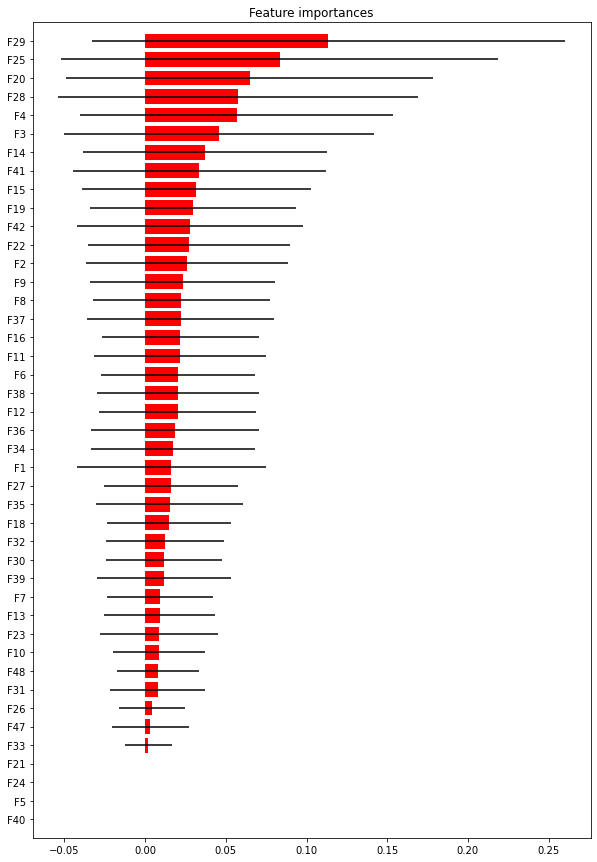

In [59]:
utils.plot_feature_importance(feature_importance, X)